Part 1 a - Apriori based recommendation

Install required libraries

Before we move forward, we need to install the ‘apyori’ package first

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=890ccd821908601066948123f088e3b5d16006edb1be1d727583885b4e7fb62c
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


Import the libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Preprocessing the data

 Load the dataset

In [ ]:
dataset = pd.read_csv('MajorML.csv', header = None)
transactions = []
for i in range(0, 7501):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

Viewing the dataset

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Sofosbuvir,Shringix,Nasonex,Sitadol,diclofenac,Mavyret,Mematine,lantus,lasicx,Mycapssa,Colace,Nubeqa,triotiptum,Metaolazone,diclofenac,Mobic,Motrin,Serncio,maximtem,diclofenac
1,humulin,Levodopa,alprazole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Clodan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cefdinir,Nasonex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,diclofenac,Azithromycin,Albuterol,Pradaxa,Nubeqa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,addreall,discatone,epitamineepitamine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,humulin,Lupron,alprazole,addreall,gemazar,Nubeqa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,Lisdexamfetamine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,Pregabalin,Nubeqa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
most_sold = dataset.value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

0           1         2        3        4           5        6         7       8       9         10      11      12          13           14          15     16      17       18        19        
Sofosbuvir  Shringix  Nasonex  Sitadol  diclofenac  Mavyret  Mematine  lantus  lasicx  Mycapssa  Colace  Nubeqa  triotiptum  Metaolazone  diclofenac  Mobic  Motrin  Serncio  maximtem  diclofenac    1
dtype: int64


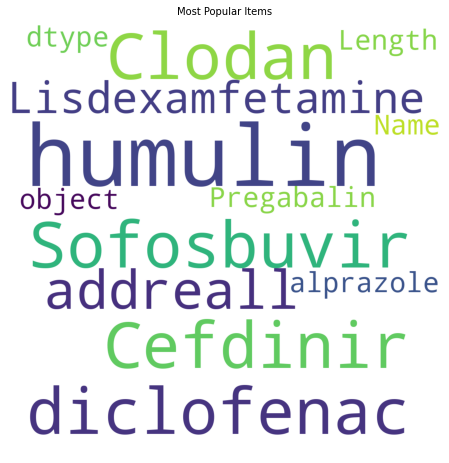

In [ ]:
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 8)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 1000).generate(str(dataset[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 10)
plt.show()

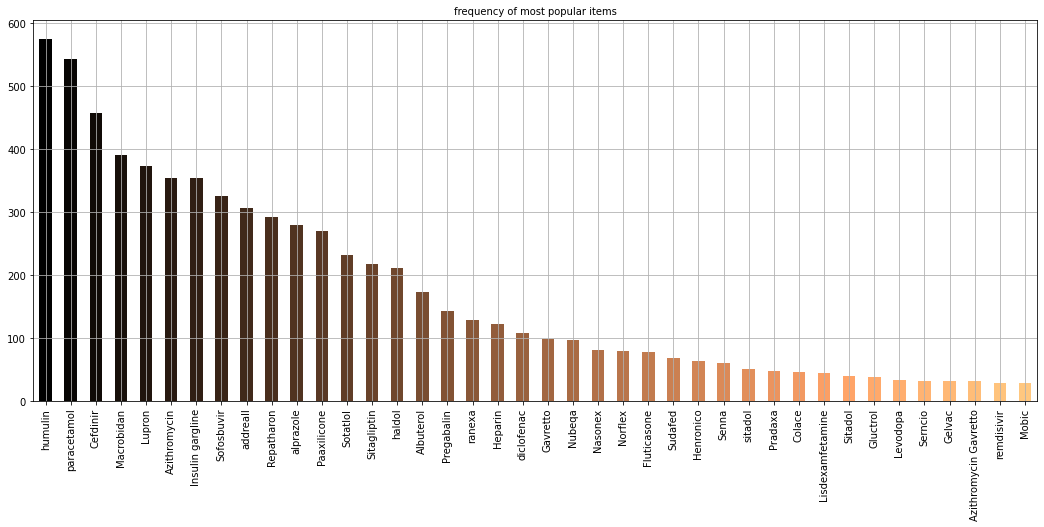

In [ ]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
dataset[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 10)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Training the model

In [ ]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 1.5, min_length = 2, max_length = 2)

Visualization of results

Displaying the first results coming directly from the output of the apriori function

In [ ]:
results = list(rules)

In [ ]:
results

[RelationRecord(items=frozenset({'Azithromycin', 'Albuterol'}), support=0.021197173710171976, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Albuterol'}), items_add=frozenset({'Azithromycin'}), confidence=0.3028571428571429, lift=1.522608196093451)]),
 RelationRecord(items=frozenset({'Insulin gargline', 'Alprimine'}), support=0.003199573390214638, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Alprimine'}), items_add=frozenset({'Insulin gargline'}), confidence=0.36923076923076925, lift=2.1206738131699847)]),
 RelationRecord(items=frozenset({'Azithromycin', 'Fluticasone'}), support=0.01986401813091588, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Fluticasone'}), items_add=frozenset({'Azithromycin'}), confidence=0.3931398416886544, lift=1.9765026491331077)]),
 RelationRecord(items=frozenset({'Azithromycin', 'Hofine'}), support=0.009865351286495135, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Hofine'}), items_add=frozenset({'Azithro

Organising the results

In [ ]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

Displaying non - sorted results

In [ ]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,Albuterol,Azithromycin,0.021197,0.302857,1.522608
1,Alprimine,Insulin gargline,0.003200,0.369231,2.120674
2,Fluticasone,Azithromycin,0.019864,0.393140,1.976503
3,Hofine,Azithromycin,0.009865,0.383420,1.927635
4,Azithromycin,Insulin gargline,0.054793,0.275469,1.582155
...,...,...,...,...,...
116,glucagon,paracetamol,0.004933,0.345794,1.553176
117,ranexa,paracetamol,0.007732,0.347305,1.559963
118,remdisivir,paracetamol,0.014798,0.352381,1.582760
119,remdisivir Macrobidan,paracetamol,0.005333,0.449438,2.018704


Displaying the results ordered by descending lifts

In [ ]:
x=resultsinDataFrame.nlargest(n = 10, columns = 'Lift')
x

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
68,Levothyroxine,Lisdexamfetamine,0.004533,0.290598,4.843951
99,Rosuvastatin,Pregabalin,0.005733,0.300699,3.790833
105,Sotatlol,Sitagliptin,0.015998,0.323450,3.291994
103,Shringix,humulin,0.005199,0.254902,2.923577
77,sitadol,Lupron,0.005466,0.275168,2.886760
57,gabapentin,Insulin gargline,0.003733,0.482759,2.772720
29,Fluticasone,diclofenac,0.011332,0.224274,2.545056
101,Senna,Sitagliptin,0.006532,0.246231,2.506079
75,haldol,Lupron,0.016131,0.235867,2.474464
74,Sofosbuvir,Lupron,0.016664,0.233209,2.446574


In [ ]:
z=['Le+Li','Ro+Pr','So+Si','Sh+hu','si+Lu','ga+In','Flu+dic','Se+Si','ha+Lu','So+Lu']
x['var']=z
x

,Left Hand Side,Right Hand Side,Support,Confidence,Lift,var
68,Levothyroxine,Lisdexamfetamine,0.004533,0.290598,4.843951,Le+Li
99,Rosuvastatin,Pregabalin,0.005733,0.300699,3.790833,Ro+Pr
105,Sotatlol,Sitagliptin,0.015998,0.323450,3.291994,So+Si
103,Shringix,humulin,0.005199,0.254902,2.923577,Sh+hu
77,sitadol,Lupron,0.005466,0.275168,2.886760,si+Lu
57,gabapentin,Insulin gargline,0.003733,0.482759,2.772720,ga+In
29,Fluticasone,diclofenac,0.011332,0.224274,2.545056,Flu+dic
101,Senna,Sitagliptin,0.006532,0.246231,2.506079,Se+Si
75,haldol,Lupron,0.016131,0.235867,2.474464,ha+Lu
74,Sofosbuvir,Lupron,0.016664,0.233209,2.446574,So+Lu


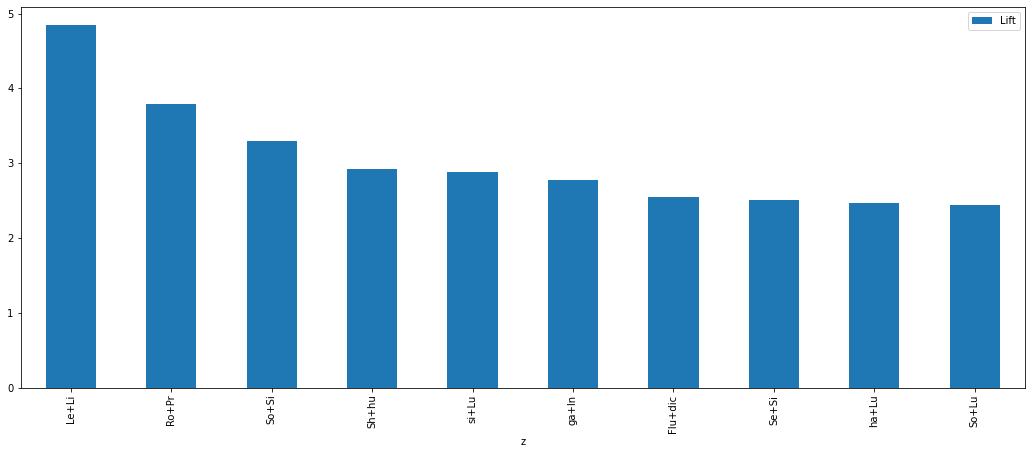

In [ ]:
df = pd.DataFrame({
    'z':['Le+Li','Ro+Pr','So+Si','Sh+hu','si+Lu','ga+In','Flu+dic','Se+Si','ha+Lu','So+Lu'] ,
    'Lift': [4.843951, 3.790833, 3.291994,2.923577,2.886760,2.772720,2.545056,2.506079,2.474464,2.446574]
})
# plotting graph
df.plot(x="z", y='Lift', kind="bar")

ECLAT model result


In [ ]:
resultsinDataFrame.nlargest(n = 10,
                    columns = 'Support')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
4,Azithromycin,Insulin gargline,0.054793,0.275469,1.582155
53,Insulin gargline,Sitagliptin,0.039195,0.225115,2.291162
106,Sitagliptin,paracetamol,0.038128,0.388060,1.743015
9,Lupron,Azithromycin,0.033329,0.349650,1.757860
76,Lupron,paracetamol,0.033196,0.348252,1.564213
92,Norflex,paracetamol,0.032662,0.343619,1.543403
16,Sitagliptin,Azithromycin,0.031729,0.322931,1.623528
111,humulin,alprazole,0.028796,0.330275,1.837830
56,diclofenac,Insulin gargline,0.028396,0.322239,1.850777
18,diclofenac,Azithromycin,0.027996,0.317700,1.597233


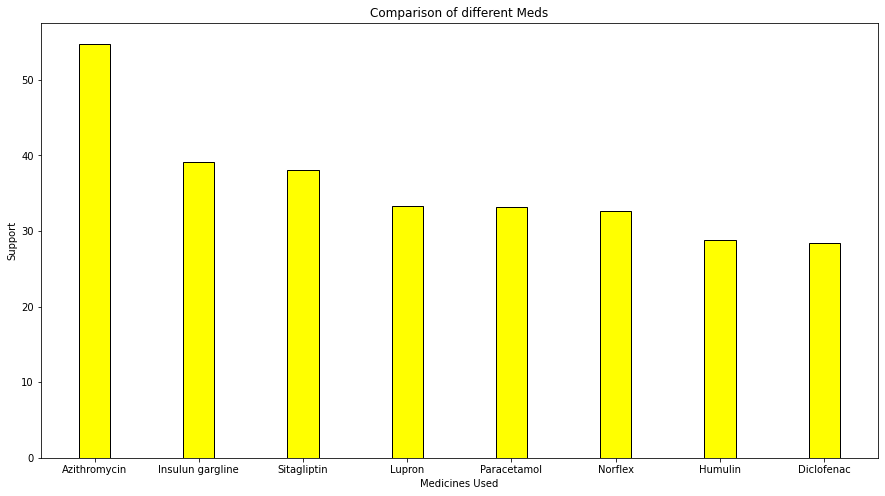

In [ ]:
data = {'Azithromycin':54.793,'Insulun gargline':39.195, 'Sitagliptin':38.128,'Lupron':33.329, 
        'Paracetamol':33.196,'Norflex':32.662, 'Humulin':28.796,'Diclofenac':28.396}
Medicines = list(data.keys())
Support = list(data.values())
fig = plt.figure(figsize = (15, 8))
# creating the bar plot
plt.bar(Medicines, Support, color ='yellow',edgecolor='black',
        width = 0.3)
 
plt.xlabel("Medicines Used")
plt.ylabel("Support")
plt.title("Comparison of different Meds")
plt.show()

Part 2 - Classifiers

In [ ]:
import sys
import sklearn

print('Python: {}'.format(sys.version))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]
Sklearn: 1.0.2


In [ ]:
# import the uci Molecular Biology (Promoter Gene Sequences) Data Set
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)

In [ ]:
print(data.iloc[0])

Class                                                       +
id                                                        S10
Sequence    \t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
Name: 0, dtype: object


In [ ]:
classes = data.loc[:, 'Class']
print(classes[:5])

0    +
1    +
2    +
3    +
4    +
Name: Class, dtype: object


In [ ]:
# generate list of DNA sequences
sequences = list(data.loc[:, 'Sequence'])
dataset = {}

# loop through sequences and split into individual nucleotides
for i, seq in enumerate(sequences):
    
    # split into nucleotides, remove tab characters
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t']
    
    # append class assignment
    nucleotides.append(classes[i])
    
    # add to dataset
    dataset[i] = nucleotides
    
print(dataset[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [ ]:
# turn dataset into pandas DataFrame
dframe = pd.DataFrame(dataset)
print(dframe)

   0   1   2   3   4   5   6   7   8   9    ... 96  97  98  99  100 101 102  \
0    t   t   g   a   t   a   c   t   c   t  ...   c   c   t   a   g   c   g   
1    a   g   t   a   c   g   a   t   g   t  ...   c   g   a   g   a   c   t   
2    c   c   a   t   g   g   g   t   a   t  ...   g   c   t   a   g   t   a   
3    t   t   c   t   a   g   g   c   c   t  ...   a   t   g   g   a   c   t   
4    a   a   t   g   t   g   g   t   t   a  ...   g   a   a   g   g   a   t   
5    g   t   a   t   a   c   g   a   t   a  ...   t   g   c   g   c   a   c   
6    c   c   g   g   a   a   g   c   a   a  ...   a   g   c   t   a   t   t   
7    a   c   a   a   t   a   t   a   a   t  ...   g   a   g   g   t   g   c   
8    a   t   g   t   t   g   g   a   t   t  ...   a   c   a   t   g   g   a   
9    t   g   a   g   a   g   g   a   a   t  ...   c   t   a   a   t   c   a   
10   a   a   a   t   a   a   a   a   t   c  ...   c   t   c   c   c   c   c   
11   c   c   c   g   c   g   g   c   a   c  ...   c 

In [ ]:
# transpose the DataFrame
df = dframe.transpose()
print(df.iloc[:5])

  0  1  2  3  4  5  6  7  8  9   ... 48 49 50 51 52 53 54 55 56 57
0  t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t  +
1  t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a  +
2  g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g  +
3  a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c  +
4  t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g  +

[5 rows x 58 columns]


In [ ]:
# for clarity, lets rename the last dataframe column to class
df.rename(columns = {57: 'Class'}, inplace = True) 
print(df.iloc[:5])

   0  1  2  3  4  5  6  7  8  9  ... 48 49 50 51 52 53 54 55 56 Class
0  t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t     +
1  t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a     +
2  g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g     +
3  a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c     +
4  t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g     +

[5 rows x 58 columns]


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,c,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [ ]:
# desribe does not tell us enough information since the attributes are text. Lets record value counts for each sequence
series = []
for name in df.columns:
    series.append(df[name].value_counts())
    
info = pd.DataFrame(series)
details = info.transpose()
print(details)

      0     1     2     3     4     5     6     7     8     9  ...    48  \
t  38.0  26.0  27.0  26.0  22.0  24.0  30.0  32.0  32.0  28.0  ...  21.0   
c  27.0  22.0  21.0  30.0  19.0  18.0  21.0  20.0  22.0  22.0  ...  36.0   
a  26.0  34.0  30.0  22.0  36.0  42.0  38.0  34.0  33.0  36.0  ...  23.0   
g  15.0  24.0  28.0  28.0  29.0  22.0  17.0  20.0  19.0  20.0  ...  26.0   
+   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
-   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

     49    50    51    52    53    54    55    56  Class  
t  22.0  23.0  33.0  35.0  30.0  23.0  29.0  34.0    NaN  
c  42.0  31.0  32.0  21.0  32.0  29.0  29.0  17.0    NaN  
a  24.0  28.0  27.0  25.0  22.0  26.0  24.0  27.0    NaN  
g  18.0  24.0  14.0  25.0  22.0  28.0  24.0  28.0    NaN  
+   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   53.0  
-   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   53.0  

[6 rows x 58 columns]


In [ ]:
# Unfortunately, we can't run machine learning algorithms on the data in 'String' formats. As a result, we need to switch
# it to numerical data. This can easily be accomplished using the pd.get_dummies() function
numerical_df = pd.get_dummies(df)
numerical_df.iloc[:5]

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [ ]:
# We don't need both class columns.  Lets drop one then rename the other to simply 'Class'.
df = numerical_df.drop(columns=['Class_-'])

df.rename(columns = {'Class_+': 'Class'}, inplace = True)
print(df.iloc[:5])

   0_a  0_c  0_g  0_t  1_a  1_c  1_g  1_t  2_a  2_c  ...  54_t  55_a  55_c  \
0    0    0    0    1    1    0    0    0    0    1  ...     0     0     0   
1    0    0    0    1    0    0    1    0    0    1  ...     0     1     0   
2    0    0    1    0    0    0    0    1    1    0  ...     0     0     1   
3    1    0    0    0    1    0    0    0    0    0  ...     0     0     0   
4    0    0    0    1    0    1    0    0    0    0  ...     1     1     0   

   55_g  55_t  56_a  56_c  56_g  56_t  Class  
0     1     0     0     0     0     1      1  
1     0     0     1     0     0     0      1  
2     0     0     0     0     1     0      1  
3     0     1     0     1     0     0      1  
4     0     0     0     0     1     0      1  

[5 rows x 229 columns]


In [ ]:
# Use the model_selection module to separate training and testing datasets
from sklearn import model_selection

# Create X and Y datasets for training
X = np.array(df.drop(['Class'], 1))
y = np.array(df['Class'])

# define seed for reproducibility
seed = 1

# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=seed)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
# import some performance metrics, such as accuracy_score and classification_report.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score

# define scoring method
scoring = 'accuracy'

# Define models to train
names = ["Nearest Neighbors", "Gaussian Process",
         "Decision Tree", "Random Forest", 
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=7, n_estimators=15, max_features=1),
    GaussianNB()
]

models = zip(names, classifiers)

# evaluate each model in turn
results = []
names = []

#performance on the training data is not that important. We want to know how well our algorithms
# can generalize to new data.  To test this, we make predictions on the validation dataset
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions)*100)
    print(classification_report(y_test,predictions))
 
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives

Nearest Neighbors: 0.828571 (0.130785)
Nearest Neighbors
78.125
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        20
           1       0.63      1.00      0.77        12

    accuracy                           0.78        32
   macro avg       0.82      0.82      0.78        32
weighted avg       0.86      0.78      0.78        32

Gaussian Process: 0.762500 (0.167143)
Gaussian Process
87.5
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.75      1.00      0.86        12

    accuracy                           0.88        32
   macro avg       0.88      0.90      0.87        32
weighted avg       0.91      0.88      0.88        32

Decision Tree: 0.667857 (0.170758)
Decision Tree
84.375
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.73      0.92      0.81        12

  

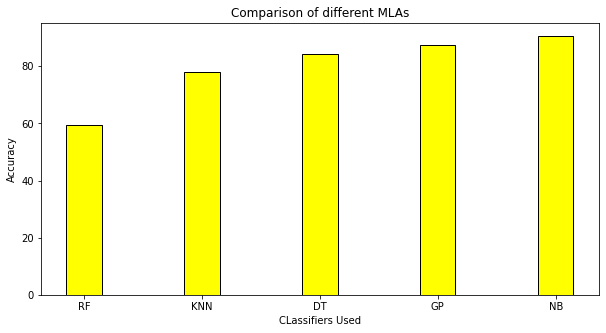

In [ ]:
# Creating plot to show the train accuracy

data = {'RF':59.375,'KNN':78.125, 'DT':84.375,'GP':87.5, 'NB':90.625}
Classifiers = list(data.keys())
Accuracy = list(data.values())
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(Classifiers, Accuracy, color ='yellow',edgecolor='black',
        width = 0.3)
 
plt.xlabel("CLassifiers Used")
plt.ylabel("Accuracy")
plt.title("Comparison of different MLAs")
plt.show()